
# Predicción del precio de venta de una casa
1. El siguiente código muestra un ejemplo de cómo utilizar un modelo de regresión lineal para predecir el precio de venta de una casa en función de su tamaño.
2. De forma educativa se aplican las funciones de activación

ReLU: Para eliminar valores negativos predichos.
Sigmoid y Tanh: Normalizar los resultados predichos a un rango limitado.
Softmax y Softplus: Solo para mostrar su salida a modo de ejemplo.



In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Datos de ejemplo: tamaño de la casa (en metros cuadrados) y precio de venta
data = {
    'Tamaño (metros cuadrados)': [150, 1800, 2000, 1800, 200],
    'Precio de Venta (COP)': [250, 300, 3500, 2800, 32] #*10^6
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Separar las características (X) y la variable objetivo (y)
X = df[['Tamaño (metros cuadrados)']]
y = df['Precio de Venta (COP)']

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X, y)

# Predicción
house_size = [[2000]]  # tamaño de la nueva casa en metros cuadrados
predicted_price = model.predict(house_size)

print("Predicción de precio de venta de una casa de 2000 pies cuadrados (Regresión Lineal):")
print("Precio predicho (regresión lineal):", predicted_price)

# Definir funciones de activación
def relu(Z):
    return np.maximum(0, Z)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def tanh(Z):
    return np.tanh(Z)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z))
    return expZ / np.sum(expZ)

def softplus(Z):
    return np.log(1 + np.exp(Z))

# Resultado de la regresión lineal usando cada función de activación
Z = model.intercept_ + np.dot(house_size, model.coef_.reshape(-1, 1))

# ReLU
predicted_price_relu = relu(Z)
print("\nUsando función de activación ReLU:")
print("Precio transformado (ReLU):", predicted_price_relu)

# Sigmoid
predicted_price_sigmoid = sigmoid(Z)
print("\nUsando función de activación Sigmoid:")
print("Precio transformado (Sigmoid):", predicted_price_sigmoid)

# Tanh
predicted_price_tanh = tanh(Z)
print("\nUsando función de activación Tanh:")
print("Precio transformado (Tanh):", predicted_price_tanh)

# Softmax
predicted_price_softmax = softmax(Z)
print("\nUsando función de activación Softmax:")
print("Precio transformado (Softmax):", predicted_price_softmax)

# Softplus
predicted_price_softplus = softplus(Z)
print("\nUsando función de activación Softplus:")
print("Precio transformado (Softplus):", predicted_price_softplus)


Predicción de precio de venta de una casa de 2000 pies cuadrados (Regresión Lineal):
Precio predicho (regresión lineal): [2413.89254766]

Usando función de activación ReLU:
Precio transformado (ReLU): [[2413.89254766]]

Usando función de activación Sigmoid:
Precio transformado (Sigmoid): [[1.]]

Usando función de activación Tanh:
Precio transformado (Tanh): [[1.]]

Usando función de activación Softmax:
Precio transformado (Softmax): [[1.]]

Usando función de activación Softplus:
Precio transformado (Softplus): [[inf]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-3-fc9821d37ff6>:45: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(Z))


# Resultados de la experimentación

* **Relu**: Genera un valor igual al máximo calculado por el regresor lineal.
* **Sigmoid**: Dado que el precio predicho Z es un valor muy alto el resultado es 1, esto es 1/exp(-Z) -> 0.
* **Tanh**: los términos exp(-Z) se hacen insignificantes respecto a exp(Z), por ende Tanh -> 1
* **Softmax**: Como hay un único valor (no un vector) de entrada, el denominador y el numerador quedan iguales y se tiene exp(Z)/exp(Z) -> 1
* **Softplus**: Genera un desborde de cómputo dado que log(1+exp(Z))-> inf.

# Conclusiones
1. Para predicción de valores contínuos el regresor lineal permite un ajuste adecuado.
2. Pasar por funciones de activación un solo valor predicho por el regresor a las funciones de activación mostradas puede no ser útil salvo en contextos educativos.
3. Si la entrada a la función de activación no fuera un valor único sino un vector de K valores Softmax podría servirnos para ver cómo convertir los resultados en una distribución de probabilidad de esos K valores.
3. Funciones como Softplus pueden llevar a problemas de desbordamiento numérico si no se manejan correctamente.


# Ejemplo práctico durante la clase (15-feb-2024, 20:45)

 Por: Andrés Felipe Escallón Portilla

In [ ]:
prompt="you´re a python expert, please give code to get the correlation matrix of a dataframe with a simple example and calculus explanation"

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a dataset
# Let´s build the values lists
value_n_list = ['Andrew', 'Phillip', 'John']
print(value_n_list)

value_w_list = [50,         78,      91.5] # [kg]
value_h_list = [1.76,      1.87,     1.69] # [m]
# value_bmi_list will be calculated: bmi = w/(h^2)
#value_bmi_list = [25,25,25] # init values [kg/m2]

# Let´s use a dictionary ({key:value})
# with the format {"str":list}
data_dict = {"name":value_n_list,
             "weight":value_w_list,
             "height":value_h_list} #,
              #"BMI":value_bmi_list}

print(data_dict)

# Turn a dictionary into a dataframe
df = pd.DataFrame(data_dict)

print(df)
# Call a variable
df

['Andrew', 'Phillip', 'John']
{'name': ['Andrew', 'Phillip', 'John'], 'weight': [50, 78, 91.5], 'height': [1.76, 1.87, 1.69]}
      name  weight  height
0   Andrew    50.0    1.76
1  Phillip    78.0    1.87
2     John    91.5    1.69


,name,weight,height
0,Andrew,50.0,1.76
1,Phillip,78.0,1.87
2,John,91.5,1.69


In [ ]:
df

,name,weight,height
0,Andrew,50.0,1.76
1,Phillip,78.0,1.87
2,John,91.5,1.69


In [ ]:
df

,name,weight,height
0,Andrew,50.0,1.76
1,Phillip,78.0,1.87
2,John,91.5,1.69


In [ ]:
df

,name,weight,height
0,Andrew,50.0,1.76
1,Phillip,78.0,1.87
2,John,91.5,1.69


In [ ]:
# prompt: Con DataFrame df: add another column

df['bmi'] = df['weight'] / (df['height'] ** 2)
df


,name,weight,height,bmi
0,Andrew,50.0,1.76,16.141529
1,Phillip,78.0,1.87,22.305471
2,John,91.5,1.69,32.036693


In [ ]:
df.describe()

,weight,height,bmi
count,3.000000,3.000000,3.000000
mean,73.166667,1.773333,23.494564
std,21.167979,0.090738,8.014020
min,50.000000,1.690000,16.141529
25%,64.000000,1.725000,19.223500
50%,78.000000,1.760000,22.305471
75%,84.750000,1.815000,27.171082
max,91.500000,1.870000,32.036693


## Making some transformations on the df

In [ ]:
# z = x / y*y
df["BMI"] =  df["weight"] / df["height"]**2
df

,name,weight,height,bmi,BMI
0,Andrew,50.0,1.76,16.141529,16.141529
1,Phillip,78.0,1.87,22.305471,22.305471
2,John,91.5,1.69,32.036693,32.036693


De acuerdo a los resultados puede conlcuir que:

-El valor max es:
-

In [ ]:
df["BMI"].dtype

dtype('float64')

In [ ]:
# TO-DO: create another column with integers and turn it to float, such as:
df["BMI"] = df["BMI"].astype(float)

In [ ]:
df["BMI"].dtype

dtype('float64')

In [ ]:
df["name"].dtype
# Homework: how to verify that a column contains string

dtype('O')

In [ ]:
df

,name,weight,height,bmi,BMI
0,Andrew,50.0,1.76,16.141529,16.141529
1,Phillip,78.0,1.87,22.305471,22.305471
2,John,91.5,1.69,32.036693,32.036693


In [ ]:
df_filtered_less_18_5 = df[df['BMI'] < 18.5]

print("Personas con BMI < 18.5:")
print(df_filtered_less_18_5)

Personas con BMI < 18.5:
     name  weight  height        bmi        BMI
0  Andrew    50.0    1.76  16.141529  16.141529


In [ ]:
df_filtered_between_18_5and_24_9 = df[(df['BMI'] >= 18.5) & (df['BMI'] <= 24.9)]

In [ ]:
df_BMI_filtered = df[df['BMI'] > 25]

**Ejercicio practico**

## Init steps towards EDA (Exploratory Data Analisys):
 Homework: perform a full EDA with your own invented dataset with at least 10 rows

In [ ]:
# Descriptive stats
df_stats = df.describe()
df_stats

,weight,height,bmi,BMI
count,3.000000,3.000000,3.000000,3.000000
mean,73.166667,1.773333,23.494564,23.494564
std,21.167979,0.090738,8.014020,8.014020
min,50.000000,1.690000,16.141529,16.141529
25%,64.000000,1.725000,19.223500,19.223500
50%,78.000000,1.760000,22.305471,22.305471
75%,84.750000,1.815000,27.171082,27.171082
max,91.500000,1.870000,32.036693,32.036693


### TO-DO: please analyze the results (univariate: describe() / multivariate: correlation matrix)



In [ ]:
#df["health_condition"] = 'within the normal range' if 18.0<=df['BMI']<=25.0 else 'out of the normal range'
#df

# Prompt used in chat GPT (by OpenAI) / Gemini (by Google) / Bing (Copilot by Microsoft) to solve the above error:

You are a python expert, please help with the error I will show later that is appearing when I run this code in Google collab: "df["health_condition"] = 'within the normal range' if 18.0<=df['BMI']<=25.0 else 'out of the normal range'".  

The error is:

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-16-4e9a74b99b6c> in <cell line: 1>()
----> 1 df["health_condition"] = 'within the normal range' if 18.0<=df['BMI']<=25.0 else 'out of the normal range'
      2 df

/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py in __nonzero__(self)
   1525     @final
   1526     def __nonzero__(self) -> NoReturn:
-> 1527         raise ValueError(
   1528             f"The truth value of a {type(self).__name__} is ambiguous. "
   1529             "Use a.empty, a.bool(), a.item(), a.any() or a.all()."

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().




In [ ]:
df

,name,weight,height,bmi,BMI
0,Andrew,50.0,1.76,16.141529,16.141529
1,Phillip,78.0,1.87,22.305471,22.305471
2,John,91.5,1.69,32.036693,32.036693


In [ ]:
print(df)

      name  weight  height        bmi        BMI
0   Andrew    50.0    1.76  16.141529  16.141529
1  Phillip    78.0    1.87  22.305471  22.305471
2     John    91.5    1.69  32.036693  32.036693


In [ ]:
df_stats

,weight,height,bmi,BMI
count,3.000000,3.000000,3.000000,3.000000
mean,73.166667,1.773333,23.494564,23.494564
std,21.167979,0.090738,8.014020,8.014020
min,50.000000,1.690000,16.141529,16.141529
25%,64.000000,1.725000,19.223500,19.223500
50%,78.000000,1.760000,22.305471,22.305471
75%,84.750000,1.815000,27.171082,27.171082
max,91.500000,1.870000,32.036693,32.036693


In [ ]:
print(df_stats)

          weight    height        bmi        BMI
count   3.000000  3.000000   3.000000   3.000000
mean   73.166667  1.773333  23.494564  23.494564
std    21.167979  0.090738   8.014020   8.014020
min    50.000000  1.690000  16.141529  16.141529
25%    64.000000  1.725000  19.223500  19.223500
50%    78.000000  1.760000  22.305471  22.305471
75%    84.750000  1.815000  27.171082  27.171082
max    91.500000  1.870000  32.036693  32.036693


In [ ]:
df["health_condition"] = np.where(  (df['BMI'] >= 18.0) & (df['BMI'] <= 25.0) , 'within the normal range', 'out of the normal range' )
df


,name,weight,height,bmi,BMI,health_condition
0,Andrew,50.0,1.76,16.141529,16.141529,out of the normal range
1,Phillip,78.0,1.87,22.305471,22.305471,within the normal range
2,John,91.5,1.69,32.036693,32.036693,out of the normal range


In [ ]:
# Define a function to determine health condition
def determine_health_condition(bmi):
    if 18.0 <= bmi <= 25.0:
        return 'within the normal range'
    else:
        return 'out of the normal range'

# Apply the function to create the new column
df["health_condition4"] = df["BMI"].apply(determine_health_condition)


In [ ]:
print(df)
df

      name  weight  height        bmi        BMI         health_condition  \
0   Andrew    50.0    1.76  16.141529  16.141529  out of the normal range   
1  Phillip    78.0    1.87  22.305471  22.305471  within the normal range   
2     John    91.5    1.69  32.036693  32.036693  out of the normal range   

         health_condition4  
0  out of the normal range  
1  within the normal range  
2  out of the normal range  


,name,weight,height,bmi,BMI,health_condition,health_condition4
0,Andrew,50.0,1.76,16.141529,16.141529,out of the normal range,out of the normal range
1,Phillip,78.0,1.87,22.305471,22.305471,within the normal range,within the normal range
2,John,91.5,1.69,32.036693,32.036693,out of the normal range,out of the normal range


In [ ]:
# Define a function to determine health condition
def determine_health_condition7(bmi):
    """
    if 18.0 <= bmi <= 25.0:
        return 'within the normal range'
    else:
        return 'out of the normal range'
    """
    return 'within the normal range' if 18.0 <= bmi <= 25.0 else 'out of the normal range'

# Apply the function to create the new column
df["health_condition6"] = df["BMI"].apply(determine_health_condition7)
df

,name,weight,height,bmi,BMI,health_condition,health_condition4,health_condition6
0,Andrew,50.0,1.76,16.141529,16.141529,out of the normal range,out of the normal range,out of the normal range
1,Phillip,78.0,1.87,22.305471,22.305471,within the normal range,within the normal range,within the normal range
2,John,91.5,1.69,32.036693,32.036693,out of the normal range,out of the normal range,out of the normal range


#### Please remove the unnecessary columns and search how to upload/download the df as .csv and .json and .xlsx




# Correlation matrix (6th-march-2024)

ChatGPT prompt used:

"you´re a python expert, please give code to get the correlation matrix of a dataframe with a simple example and calculus explanation"

In [ ]:
 # Simple example given by chat GPT
import pandas as pd

# Create a sample DataFrame
data = {
    'A': [1, 2, 3, 4],
    'B': [4, 3, 2, 1],
    'C': [2, 4, 6, 8],
}

df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
     A    B    C
A  1.0 -1.0  1.0
B -1.0  1.0 -1.0
C  1.0 -1.0  1.0


# A more complete example with synthetic data given by ChatGPT

Correlation Matrix:
          A         B         C         D
A  1.000000 -0.136422  0.190840 -0.170227
B -0.136422  1.000000 -0.036632 -0.017613
C  0.190840 -0.036632  1.000000 -0.000259
D -0.170227 -0.017613 -0.000259  1.000000


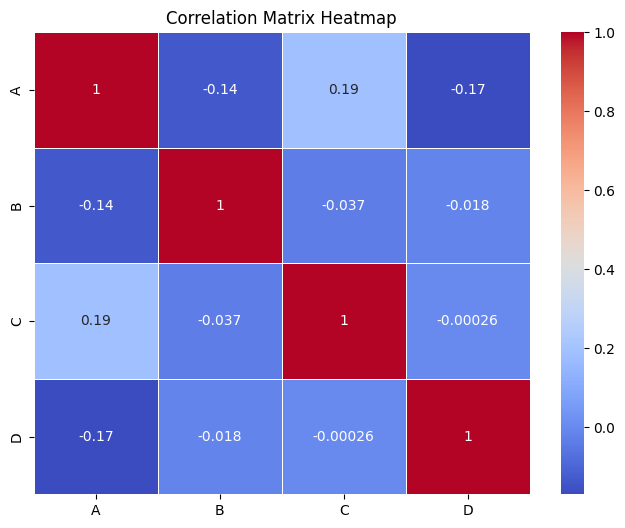

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)  # for reproducibility

data = {
    'A': np.random.randn(100),
    'B': np.random.randn(100) * 2,
    'C': np.random.randn(100) + 1,
    'D': np.random.randn(100) - 1,
}

df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
data

{'A': array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
        -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
        -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
        -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
         1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
         0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
        -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
        -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
         0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
        -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
         0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
         0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
        -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
         1.35624003, -0.07201012,  1.0035329 ,

In [ ]:
df

,A,B,C,D
0,0.496714,-2.830741,1.357787,-1.828995
1,-0.138264,-0.841291,1.560785,-1.560181
2,0.647689,-0.685429,2.083051,-0.252706
3,1.523030,-1.604555,2.053802,-0.389630
4,-0.234153,-0.322571,-0.377669,-1.020902
...,...,...,...,...
95,-1.463515,0.770635,0.307090,-1.469176
96,0.296120,-1.767715,1.899600,-2.713135
97,0.261055,0.307450,1.307300,0.353872
98,0.005113,0.116417,1.812862,-1.114540


# Consultar cómo es el cálculo de la matriz de correlación:

Chat GPT Prompt: "Please, give me the explanation mathematically about the way the correlation matrix computation is performed"

Resultado:

Incluir formulas como si estuvieran escritas en un tablero

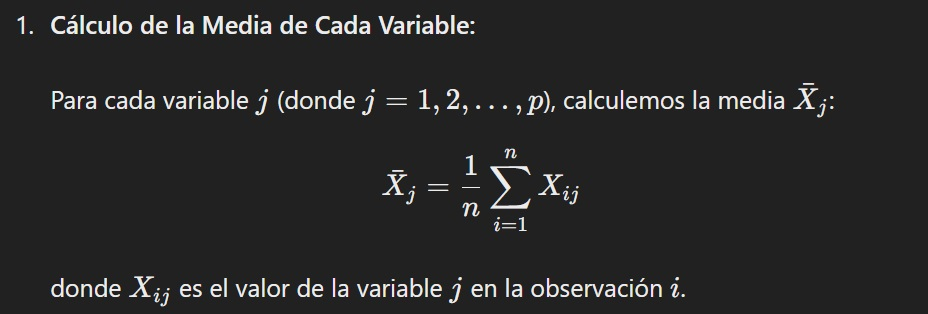
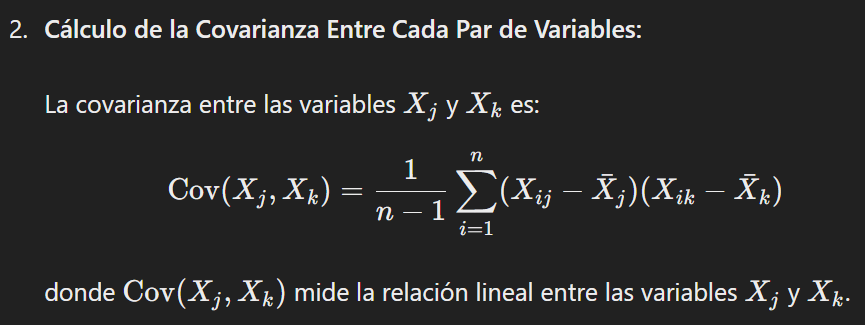

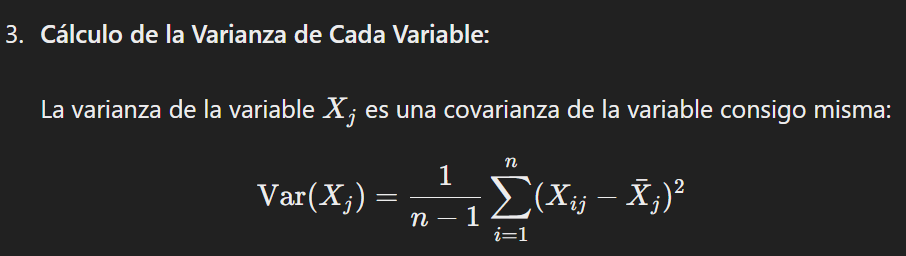

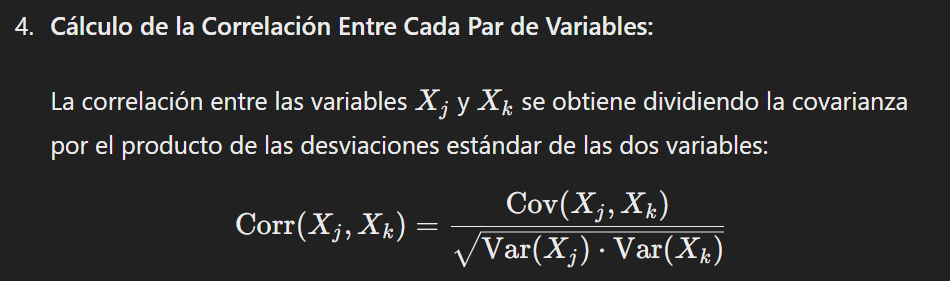

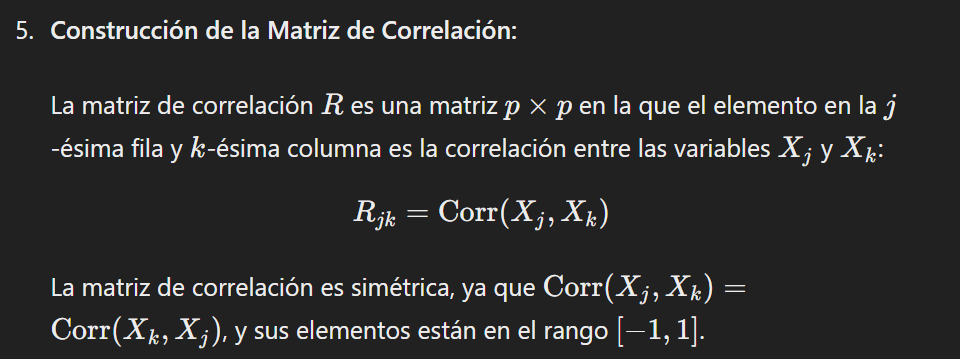


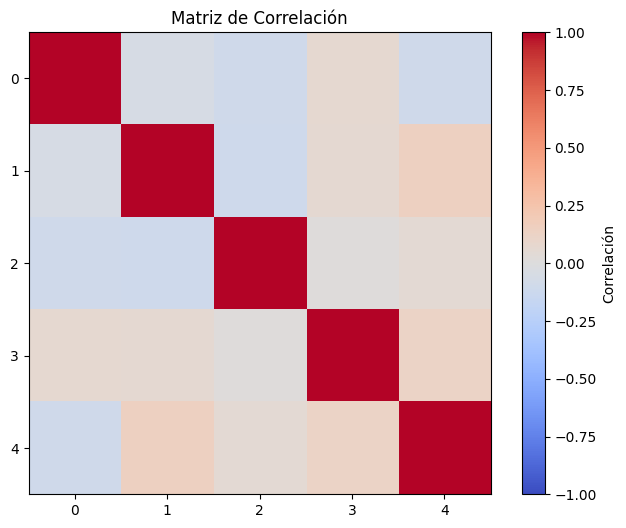

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Simulación de datos: n observaciones y p variables
np.random.seed(0)
n = 100  # número de observaciones
p = 5    # número de variables
X = np.random.randn(n, p)

# Paso 1: Cálculo de la media de cada variable
means = np.mean(X, axis=0)

# Paso 2: Cálculo de la covarianza entre cada par de variables
cov_matrix = np.cov(X, rowvar=False)

# Paso 3: Cálculo de la varianza de cada variable
variances = np.diag(cov_matrix)

# Paso 4: Cálculo de la correlación entre cada par de variables
corr_matrix = np.corrcoef(X, rowvar=False)

# Visualización de la matriz de correlación
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlación')
plt.title('Matriz de Correlación')
plt.show()
